In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data_201612 = pd.read_csv('ks-projects-201612.csv',encoding = "ISO-8859-1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_201612.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [4]:
data_201612.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [5]:
data_201801 = pd.read_csv('ks-projects-201801.csv',encoding = "ISO-8859-1")

In [6]:
data_201801.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [8]:
data_201801.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [18]:
data_201801.describe().astype('int')

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661,378661,378661,378661,374864,378661,378661
mean,1074731191,49080,9682,105,7036,9058,45454
std,619086204,1183391,95636,907,78639,90973,1152950
min,5971,0,0,0,0,0,0
25%,538263516,2000,30,2,16,31,2000
50%,1075275634,5200,620,12,394,624,5500
75%,1610148624,16000,4076,56,3034,4050,15500
max,2147476221,100000000,20338986,219382,20338986,20338986,166361390


In [75]:
#subset successful projects from the total dataset
data_2018_success = data_201801[data_201801['state']=="successful"]

#see how many successful projects in total
data_2018_success.shape

(133956, 15)

<Container object of 15 artists>

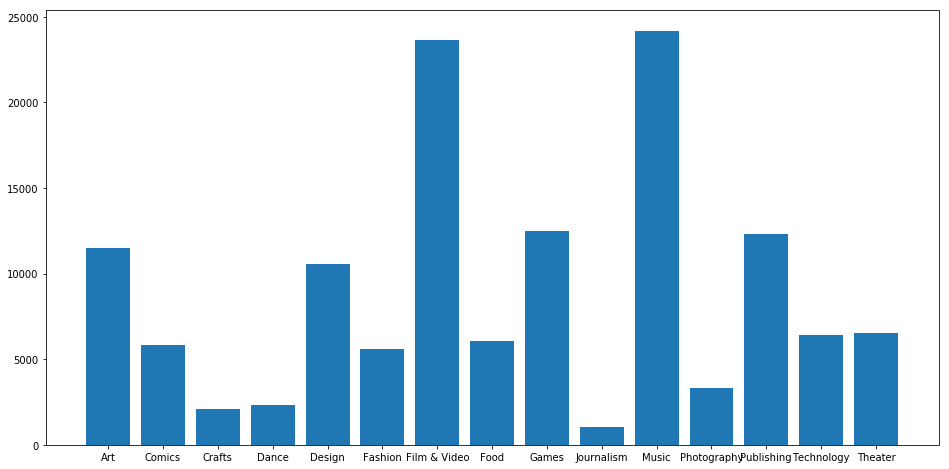

In [72]:
# plot different industries for successful projects based on project numbers
plt.figure(figsize=(16,8))
df = pd.DataFrame(data_2018_success.groupby(['main_category']).count()['usd_pledged_real'])
x = df.index
y = list(data_2018_success.groupby(['main_category']).count()['usd_pledged_real'])
plt.bar(x, y)

In [77]:
#### From the above graph, based on total project numbers, Music, Film & Video, and Games are the most successful industries to attract investors.

<Container object of 15 artists>

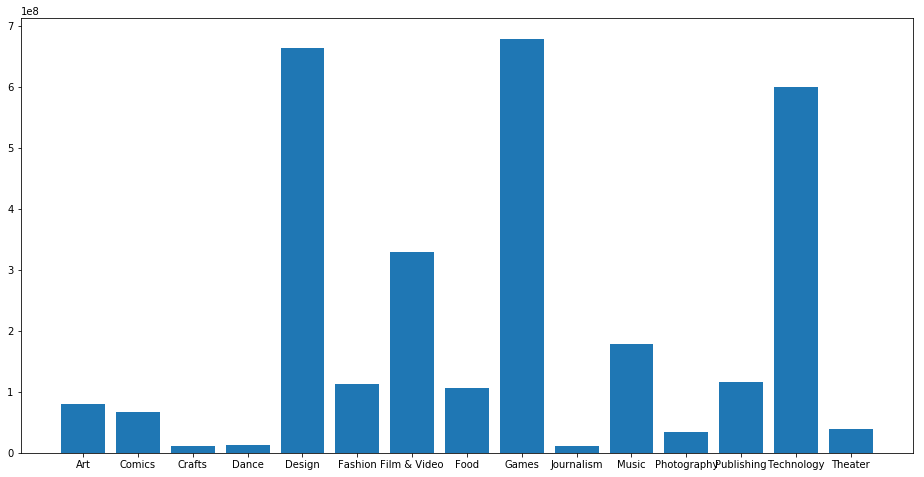

In [71]:
# plot different industries for successful projects based on total pledged USD real.

plt.figure(figsize=(16,8))
df = pd.DataFrame(data_2018_success.groupby(['main_category']).sum()['usd_pledged_real'])
x = df.index
y = list(data_2018_success.groupby(['main_category']).sum()['usd_pledged_real'])
plt.bar(x, y)

In [79]:
#### From the above graph, based on total pledged amount, Games, Design, and Technology can attract more fundings.

In [173]:

from datetime import datetime, timedelta


FMT = '%Y-%m-%d %H:%M:%S'
FMT2 = '%Y-%m-%d'


def timefun(x):
    return datetime.strptime(x, FMT)

def cal_time_diff(pair):
    st = datetime.strptime(pair[0], FMT)
    end = datetime.strptime(pair[1], FMT2)
    return (end-st).days

diff_time = list(map(lambda x: cal_time_diff(x), data_2018_success[['launched', 'deadline']].values))


data_2018_success['diff_time'] = diff_time


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


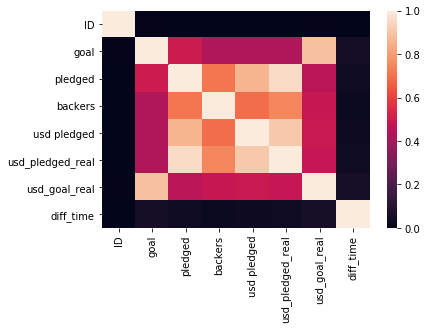

In [174]:
import seaborn as sns

sns.heatmap(data_2018_success.corr())

In [178]:
data_2018_success.usd_pledged_real.corr(data_2018_success.diff_time)

0.035368528863423017

In [179]:
# looks like the fund rase time is not very relevant to the rasied amount